In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [50]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [51]:
'''Will only return True when we have Brazil in the location, so theres no need to dropna'''
def brazil_in_location(location):
    return (type(location) is str and 'Brazil' in location)

In [52]:
one_hot_encoding_locations = [brazil_in_location(location) for location in df.Location.values]
brazilian_df = df[one_hot_encoding_locations]
len(brazilian_df)

191

In [53]:
df_crashes = brazilian_df[['Date', 'Location', 'Summary', 'Operator', 'Type']].copy()
df_crashes.fillna('Unknown', inplace=True)
df_crashes.head()

,Date,Location,Summary,Operator,Type
138,03/03/1928,"Rio de Janeiro, Brazil",Unknown,Unknown,Unknown
163,12/03/1928,Brazil,The seaplane took off form the bay and narrowl...,Syndicato Condor,Dornier Wal
164,12/04/1928,"Rio de Janeiro, Brazil",The aircraft's wingtip struck the water and cr...,Unknown,Junkers G24
227,11/07/1930,"Off of Santos, Brazil",Crashed into the sea.,Syndicato Condor,Junkers G-24
252,10/14/1931,Brazil,Unknown,Syndicato Condor,Dornier Wal


In [54]:
df_crashes.Location.replace(['Off', 'of ', 'the ', 'Macaé', 'Near'], '', regex=True, inplace=True)
# df_crashes.Location.replace(['Belelm', 'Humiata', 'Janerio', 'Florianpolis'], ['Belem', 'Humaita', 'Janeiro', 'Florianopolis'], regex=True)

In [55]:
df_crashes.Location.value_counts().index

Index(['Sao Paulo, Brazil', 'Rio de Janeiro, Brazil',
       ' Rio de Janeiro, Brazil', 'Belem, Brazil', 'Belo Horizonte, Brazil',
       ' Manaus, Brazil', 'Porto Alegre, Brazil', 'Rio Branco, Brazil',
       ' Macae, Brazil', 'Rio Doce, Brazil',
       ...
       'Sao Paolo, Brazil', 'Bage, Brazil', 'Miritituba, Brazil',
       'Itaituba, PA, Brazil', 'Manacapuru River, Brazil',
       'Sena Madureira, Brazil', ' Pelotas, Brazil', 'Joinville, Brazil',
       'Tabatinga, Brazil', 'Guaratingueta AB, Brazil'],
      dtype='object', length=141)

In [56]:
df_crashes.Location.value_counts().values

array([15, 14,  4,  4,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1])

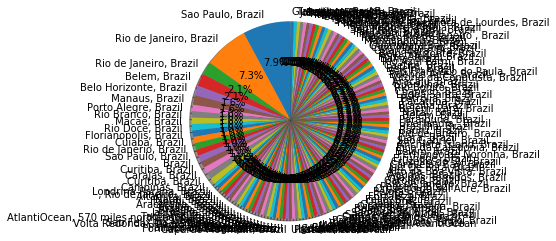

In [73]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_crashes.Location.value_counts().index
sizes = df_crashes.Location.value_counts().values
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [57]:
# Plot a scatterplot
# import matplotlib.pyplot as plt
# import numpy as np

# plt.scatter()
# # df_crashes.Location.value_counts().index
# # ax = plt.gca()

# plt.colorbar(label="petal_length")
# plt.xlabel("sepal_width")
# plt.ylabel("sepal_length")
# plt.show()

In [58]:
# Plot the crashes by airline

In [59]:
# Show the cause of each crash